# Modèles épidémiologiques



# Résolution et affichage du système déterministe SIR sur N individus avec les paramètres $\beta$ et $\gamma$

Nous allons reprendre les équations différentielles données en cours et dans le polycopié et nous allons les résoudre grâce à des méthodes Python.

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

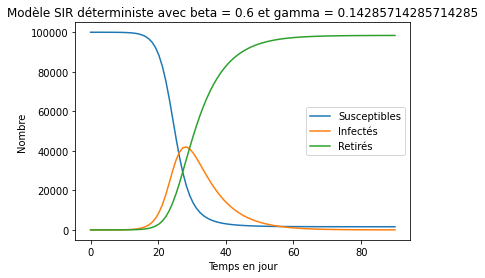

In [ ]:
# Population
N = 100000

# Nombre initial de sujets infectés et 'removed' (immunisés+décédés).
I0, R0 = 1, 0

# Individus sains au départ
S0 = N - I0 - R0

# beta l'infectiosité et gamma le taux de rétablissement moyen (en 1/jours).
beta, gamma = 0.6, 1.0/7.0

# échelle de temps (ici en jours)
t = np.linspace(0, 90, 90)

# Les équations différentielles du modèle SIR.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    S_prime = -beta * S * I / N
    I_prime = beta * S * I / N - gamma * I
    R_prime = gamma * I
    return S_prime, I_prime, R_prime

# vecteur initial
y0 = S0, I0, R0

# Résolution des équations différentielles
ret = odeint(deriv, y0, t, args=(N, beta, gamma))

S, I, R = ret.T

plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectés")
plt.plot(t, R, label="Retirés")
plt.xlabel("Temps en jour")
plt.ylabel("Nombre")
plt.legend(loc="best")
plt.title("Modèle SIR déterministe avec beta = %s et gamma = %s" % (beta, gamma))
plt.show()

# Simulation de l'évolution du processus de Markov pour une population de N individus avec les paramètres $\beta$ et $\gamma$



In [ ]:
etats_init = [S0, I0, R0]

In [ ]:
def determine_etat(etats, lambda_tot):
#  ```Comme pour le modèle du vélib, on crée une fonction qui détermine, à l'instant tiré selon 
#  une loi exponentielle de paramètre lambda_tot, si le changement est une personne qui passe de i à r 
#  (mort ou guérison) ou de s à i (contamination)
#
#  Input : 
#  - etats : vecteur de taille trois contenant le nombre de personnes dans chaque catégories
#            (s,i puis r)
#  - lambda_tot : paramètre de la loi exponentielle suivie par la durée entre le dernier
#            changement et le suivant
  
#  Output : 
#  - triplet s, i, r : le nombre à ajouter à etats pour avoir la nouvelle répartition
#  ``` 
  tirage = np.random.uniform()
  p = beta*etats[1]*etats[0]*(etats[0] > 0)/N
  if p/lambda_tot > tirage:
    return -1, 1, 0
  else:
    return 0, -1, 1 

In [ ]:
def simulation(T, graphe = True):
#  ```Cette fonction utilise donc determine_etat et tire les instants dont il est question pour
#  simuler l'évolution de la situation (via s, i et r)

#  Input : 
#  - T : la durée de la simulation en jours
#  - graphe : booléen qui indique si on veut le graph d'évolution du nombre de personnes 
#             par catégorie

#  Output : 
#  - etats : état final
#   
#  ```
  etats = etats_init.copy()
  t = 0
  Time = [0]
  evolution = [etats]
  while ((t < T) and etats[1] > 0):
    lambda_tot = (beta*etats[1]*etats[0]*(etats[0] > 0)/N) + (gamma * etats[1]*(etats[1] > 0))
    temps = np.random.exponential(1/lambda_tot)
    if temps > T :
      break
    t += temps
    Time.append(t)
    # Mise à jour des états
    s, i, r = determine_etat(etats, lambda_tot) #On choisit l'état qui change
    # on fait les transitions
    etats[0] += s
    etats[1] += i
    etats[2] += r
    etats_bis = etats.copy()
    evolution += [etats_bis]
  if graphe:
    plt.plot(Time,[state[0] for state in evolution], label="Susceptibles")
    plt.plot(Time,[state[1] for state in evolution], label="Infectés")
    plt.plot(Time,[state[2] for state in evolution], label="Retirés")
    plt.legend(loc="best")
    plt.xlabel("Temps en jour")
    plt.ylabel("Nombre")
    plt.legend(loc="best")
    plt.title("Modèle SIR déterministe avec beta = %s et gamma = %s" % (beta, gamma))
    plt.show()
  return etats

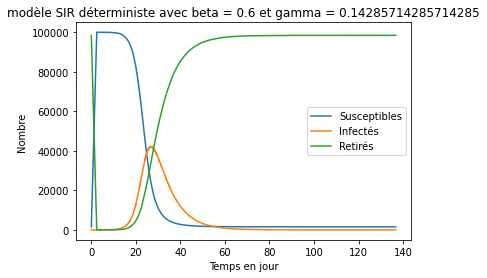

[1562, 0, 98438]

In [ ]:
#On teste sur 5 mois environ
simulation(150)

# Recherche de beta et gamma tels que tout le monde est retiré sur le long terme

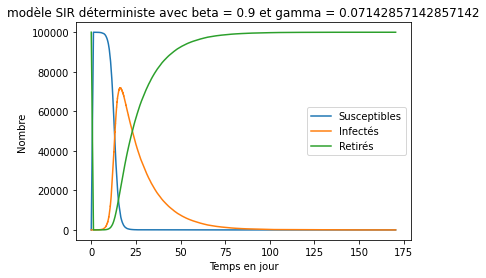

[1, 0, 99999]

In [ ]:
#On change les paramètres
beta = 0.9
gamma = 0.5/7
simulation(180)

# Recherche de beta et gamma tels que il y a une partie de la population qui reste susceptible et une autre qui est retirée

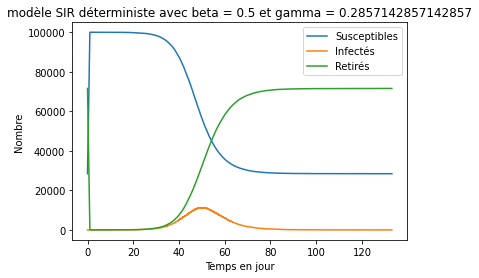

[28432, 0, 71568]

In [ ]:
beta = 0.5
gamma = 2/7
simulation(180)

# Convergence du processus de Markov renormalisé vers la solution du système déterministe

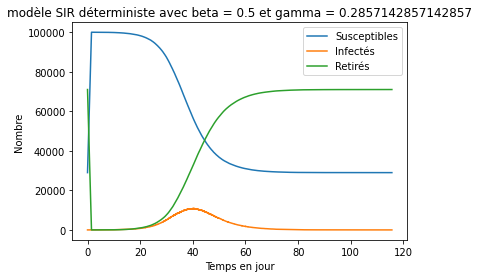

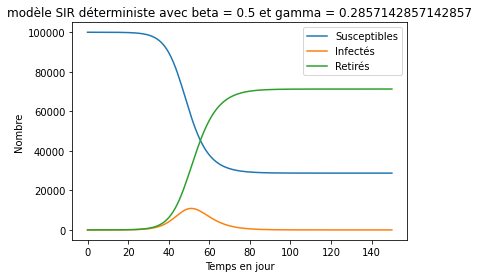

In [ ]:
simulation(150)
t = np.linspace(0, 150, 150)
ret = odeint(deriv, y0, t, args=(N, beta, gamma))

S, I, R = ret.T

plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectés")
plt.plot(t, R, label="Retirés")
plt.xlabel("Temps en jour")
plt.ylabel("Nombre")
plt.legend(loc="best")
plt.title("Modèle SIR déterministe avec beta = %s et gamma = %s" % (beta, gamma))
plt.show()